In [12]:
import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms

# For ploting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import pickle

In [47]:
# define useful utility function
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    plt.figure()
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    
def imshow_5(inp1, inp2, inp3, inp4, inp5, title1, title2, title3, title4, title5):
    
    """Imshow for Tensor."""
    inp1 = inp1.numpy().transpose((1, 2, 0))
    inp2 = inp2.numpy().transpose((1, 2, 0))
    inp3 = inp3.numpy().transpose((1, 2, 0))
    inp4 = inp4.numpy().transpose((1, 2, 0))
    inp5 = inp5.numpy().transpose((1, 2, 0))
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    inp1 = std * inp1 + mean
    inp2 = std * inp2 + mean
    inp3 = std * inp3 + mean
    inp4 = std * inp4 + mean
    inp5 = std * inp5 + mean
    
    plt.figure(figsize=(17, 5), frameon=False)
    
    ax = plt.subplot(151)
    ax.axis('off')
    plt.title(title1)
    plt.imshow(inp1)
    
    ax = plt.subplot(152)
    ax.axis('off')
    plt.title(title2)
    plt.imshow(inp2)
    
    ax = plt.subplot(153)
    ax.axis('off')
    plt.title(title3)
    plt.imshow(inp3)
    
    ax = plt.subplot(154)
    ax.axis('off')
    plt.title(title4)
    plt.imshow(inp4)
    
    ax = plt.subplot(155)
    ax.axis('off')
    plt.title(title5)
    plt.imshow(inp5)
    
    plt.pause(0.001)  # pause a bit so that plots are updated
    
def progress(count, total, suffix=''):
    """ Shows the progress of a given action 
    
    @params:
    - count : the current count of done operations
    - total : the total number of operation to do
    - suffix : a message printed after the progress bar
    """
    
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '#' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ... %s\r' % (bar, percents, '%', suffix))
    sys.stdout.flush()
    
def compute_sim_percentage_arrays(array_1, array_2):
    """
        Compute the percentage of similarity between 2 1D IntTensor of same lentgh
    """
    return (array_1 == array_2).sum()/len(array_1)

In [5]:
# define our transformation function
centre_crop = transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# load the data with cocoAPI this time we dont need transform
cap = dset.CocoCaptions(root = '/home/raille/coco-features/coco-dataset/train2017',
                        annFile = '/home/raille/coco-features/coco-dataset/annotations/captions_train2017.json',
                        transform=centre_crop)

loading annotations into memory...
Done (t=1.50s)
creating index...
index created!


In [34]:
# load all the pickle
matched_index_exact_raw = pickle.load(open("../data/match_index_faiss_exact_raw.pl", "rb"), encoding='latin1')
matched_index_exact_pca = pickle.load(open("../data/match_index_faiss_exact_pca.pl", "rb"), encoding='latin1')
matched_index_approximate_raw = pickle.load(open("../data/match_index_faiss_approximate_raw.pl", "rb"), encoding='latin1')
matched_index_approximate_pca = pickle.load(open("../data/match_index_faiss_approximate_pca.pl", "rb"), encoding='latin1')

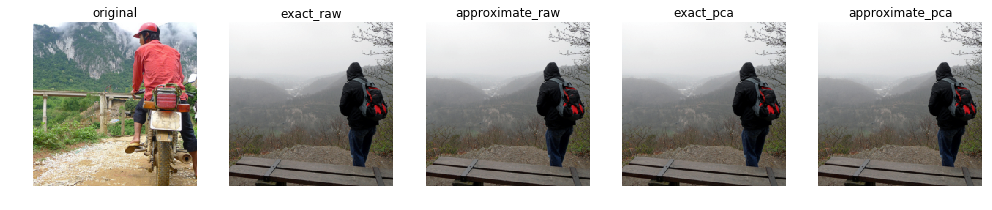

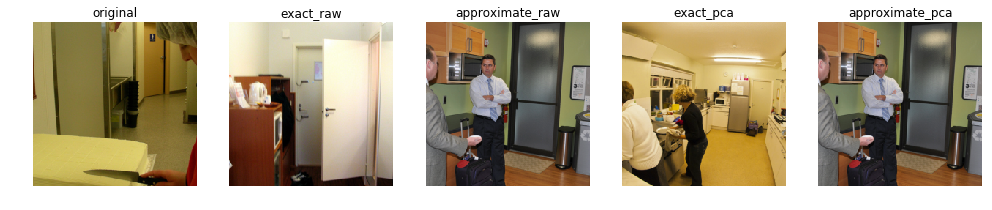

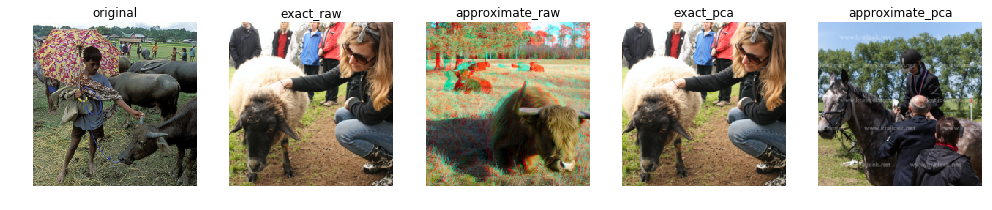

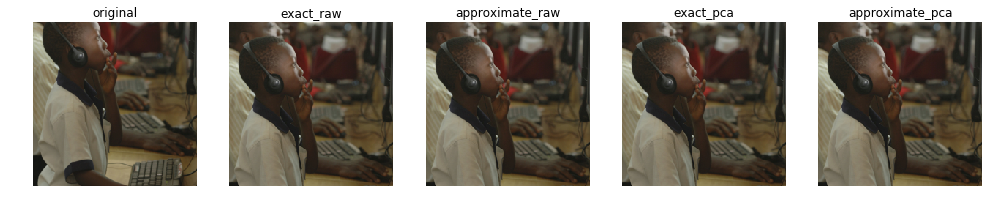

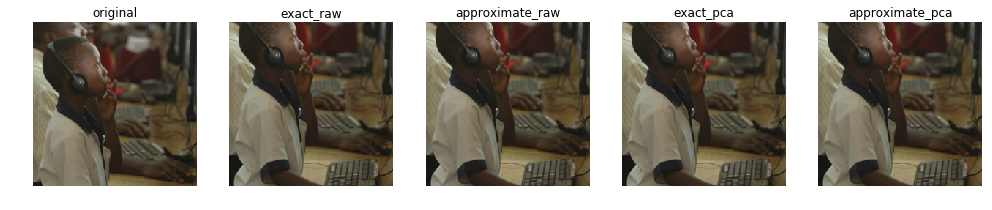

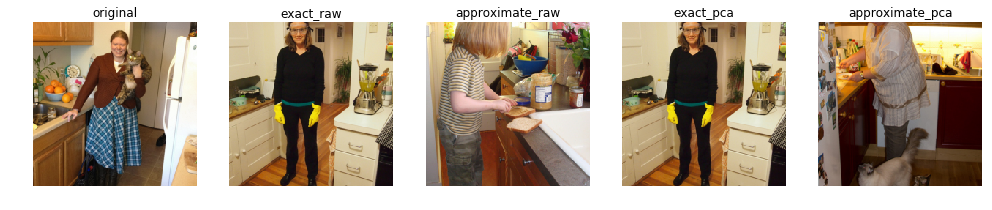

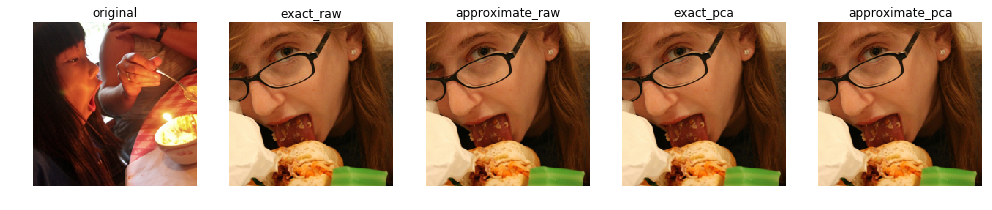

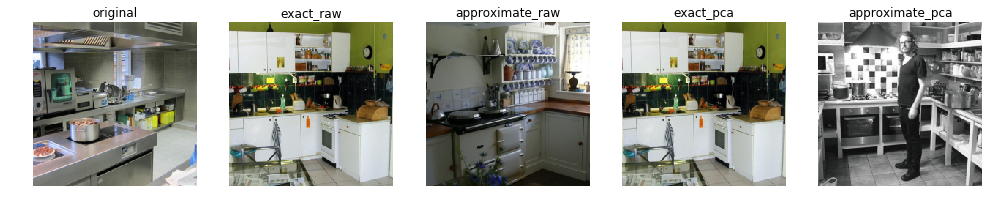

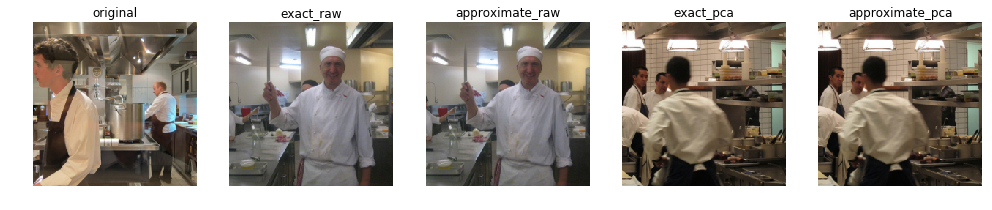

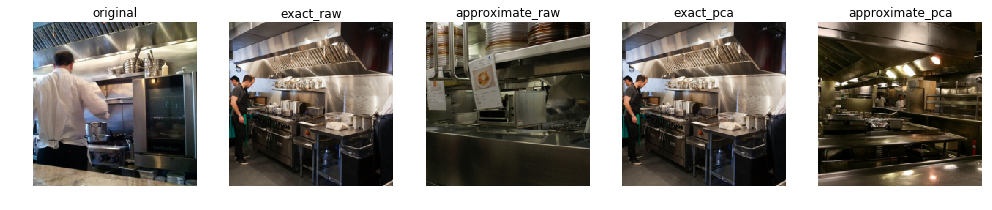

In [48]:
for i in range(0, 10):
    index_exact_raw = matched_index_exact_raw[i] 
    index_exact_pca = matched_index_exact_pca[i] 
    index_approximate_raw = matched_index_approximate_raw[i]
    index_approximate_pca = matched_index_approximate_pca[i]
    
    imshow_5(cap[i][0], cap[index_exact_raw][0], cap[index_approximate_raw][0],
             cap[index_exact_pca][0], cap[index_approximate_pca][0],
             'original', 'exact_raw', 'approximate_raw', 'exact_pca', 'approximate_pca')